# 2 필요한 라이브러리

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 3 데이터셋 로드

In [23]:
df = pd.read_csv('data/diabetes_feature.csv')
df.shape 


(768, 16)

In [24]:
# 데이터셋 미리보기
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 4 학습과 예측에 사용할 데이터셋 만들기

In [25]:
# X : feature  y : label값
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [26]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age',  'Pregnancies_high',
        'Insulin_nan',
       'low_glu_insulin']]
X.shape

(768, 9)

In [27]:
y=df['Outcome']
y.shape

(768,)

In [28]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split으로 만든다.

from sklearn.model_selection import train_test_split

# train_test_split?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
# train 세트의 문제와 정답의 데이터 수를 확인

X_train
# random_state=42 를 지우면 매번 랜덤이 되어서 똑같은 자료를 불러올 수 없으므로 지정

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,169.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0,False
106,96,122,0,22.4,0.207,27,False,102.5,True
270,101,86,37,45.6,1.136,38,True,169.5,False
435,141,0,0,42.4,0.205,29,False,169.5,False


In [30]:

X_train.shape, y_train.shape

((614, 9), (614,))

In [31]:
# test 세트의 문제와 정답의 데이터 수 확인
X_test.shape, y_test.shape

((154, 9), (154,))

## 5.1 single tree

In [32]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(random_state=42)
# model

## 5.2 bagging

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model

RandomForestClassifier(random_state=42)

## 5.3 boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model

GradientBoostingClassifier()

## 6.1 학습과 예측

In [35]:
# 학습

model.fit(X_train, y_train)

GradientBoostingClassifier()

In [36]:
model.feature_importances_

array([1.06956251e-01, 7.06893702e-03, 6.50271767e-02, 3.70559177e-02,
       2.55630445e-02, 9.50192047e-02, 1.56708089e-04, 6.63152761e-01,
       0.00000000e+00])

In [37]:
feature_names = X_train.columns.tolist()

<Axes: >

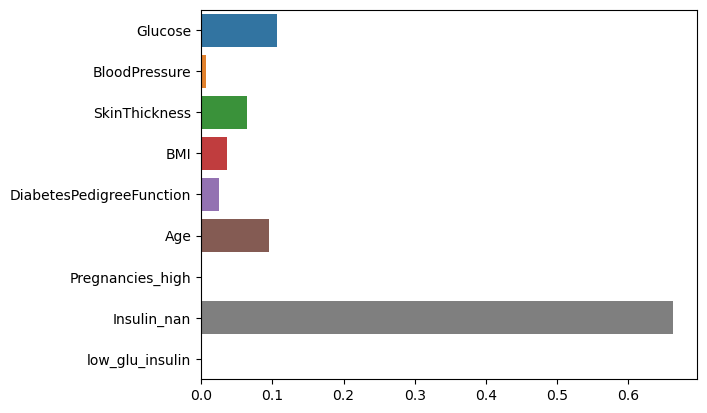

In [38]:
sns.barplot(x=model.feature_importances_, y=feature_names)

## 7.1 accuracy 측정

In [51]:
# 다르게 예측갯수 diff_count

(y_predict != y_test).sum()

23

In [52]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)*100

85.06493506493507

# 6 grid search 


In [27]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid={'max_depth': range(3,12), 
            'max_features' : [0.3, 0.5, 0.7,0.9,1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5,verbose=2)

# -1은 모든걸 다 사용한다는 의미
# cv -> cross variation ->5등분
clf.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [28]:
clf.best_params_

NameError: name 'clf' is not defined

In [29]:
clf.best_estimator_

NameError: name 'clf' is not defined

In [30]:
clf.best_score_

NameError: name 'clf' is not defined

In [31]:
# pd.DataFrame(clf.cv_results_)
# 보기 힘들어서 dataframe으로 표로 만들어 준다.
# cross valuation 값 변환
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()
# sort

NameError: name 'clf' is not defined

In [32]:
clf.predict(X_test)

NameError: name 'clf' is not defined

In [33]:
clf.score(X_test, y_test)

NameError: name 'clf' is not defined

# 6.dkfdkfjdk

In [34]:
model

RandomForestClassifier(random_state=42)

In [35]:
## 범위 안에 있는 값을 랜덤하게
max_depth = np.random.randint(1,20,10)
max_depth
## 10 개의 리스트 랜덤

array([ 3,  9,  5, 17, 18, 16, 14, 17,  4, 15])

In [36]:
max_features = np.random.uniform(0.4, 1.0, 100)
max_features

array([0.79690376, 0.86490407, 0.53173736, 0.85360533, 0.72674822,
       0.95698795, 0.53004851, 0.84754728, 0.80042643, 0.7048646 ,
       0.85621388, 0.8698226 , 0.91332797, 0.99314222, 0.95950939,
       0.47509912, 0.97639134, 0.90748659, 0.91590388, 0.82782696,
       0.65893535, 0.62738281, 0.68464349, 0.43783989, 0.71375821,
       0.89686244, 0.51815764, 0.90532935, 0.44951509, 0.83290303,
       0.68198808, 0.65449035, 0.92021098, 0.41455842, 0.67072562,
       0.41557202, 0.62692768, 0.89384291, 0.83691103, 0.57450903,
       0.59480968, 0.60698432, 0.5201723 , 0.91843024, 0.74271379,
       0.87277122, 0.42171232, 0.54587815, 0.84730232, 0.99133541,
       0.59486601, 0.8657127 , 0.93185256, 0.63825002, 0.7439755 ,
       0.98338097, 0.87666437, 0.61325489, 0.83773808, 0.88718135,
       0.57709052, 0.71477528, 0.67474784, 0.800662  , 0.54761563,
       0.45123205, 0.97127849, 0.91354787, 0.96159468, 0.48561909,
       0.72565329, 0.73733272, 0.40882271, 0.61520605, 0.41165

In [37]:
param_distributions = {'max_depth' : max_depth, 
                       'max_features':max_features,
                      'min_sample_split' : list(range(2,7))}
param_distributions

{'max_depth': array([ 3,  9,  5, 17, 18, 16, 14, 17,  4, 15]),
 'max_features': array([0.79690376, 0.86490407, 0.53173736, 0.85360533, 0.72674822,
        0.95698795, 0.53004851, 0.84754728, 0.80042643, 0.7048646 ,
        0.85621388, 0.8698226 , 0.91332797, 0.99314222, 0.95950939,
        0.47509912, 0.97639134, 0.90748659, 0.91590388, 0.82782696,
        0.65893535, 0.62738281, 0.68464349, 0.43783989, 0.71375821,
        0.89686244, 0.51815764, 0.90532935, 0.44951509, 0.83290303,
        0.68198808, 0.65449035, 0.92021098, 0.41455842, 0.67072562,
        0.41557202, 0.62692768, 0.89384291, 0.83691103, 0.57450903,
        0.59480968, 0.60698432, 0.5201723 , 0.91843024, 0.74271379,
        0.87277122, 0.42171232, 0.54587815, 0.84730232, 0.99133541,
        0.59486601, 0.8657127 , 0.93185256, 0.63825002, 0.7439755 ,
        0.98338097, 0.87666437, 0.61325489, 0.83773808, 0.88718135,
        0.57709052, 0.71477528, 0.67474784, 0.800662  , 0.54761563,
        0.45123205, 0.97127849, 0.913

In [38]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model, param_distributions,
                  n_iter=100, scoring='accuracy', n_jobs=-1,
                  cv=5, random_state=42)
clf.fit(X_train, y_train)

ValueError: Invalid parameter 'min_sample_split' for estimator RandomForestClassifier(random_state=42). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
clf.best_params_

In [ ]:
clf.best_estimator_

In [ ]:
clf.best_score_

In [ ]:
clf.score(X_test, y_test)

## 6-2

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model

## 6-2 학습과 예측하기

In [39]:
# 학습
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [40]:
# 예측하고 결과 y_predict
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

## 7 accuracy측정

In [41]:
# 다르게 예측한 갯수를 구해서 diff count에 할당
# DT :28
# RF :20
(y_predict != y_test).sum()


20

In [42]:
# accuracy score 구하
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)


0.8701298701298701

## 7 학습

In [39]:
# 학습
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
model.feature_importances_

array([1.06237790e-01, 8.09419260e-03, 6.50489124e-02, 3.65951296e-02,
       2.68147754e-02, 9.46857570e-02, 1.56708089e-04, 6.62366735e-01,
       0.00000000e+00])

In [41]:
feature_names = X_train.columns.tolist()

<Axes: >

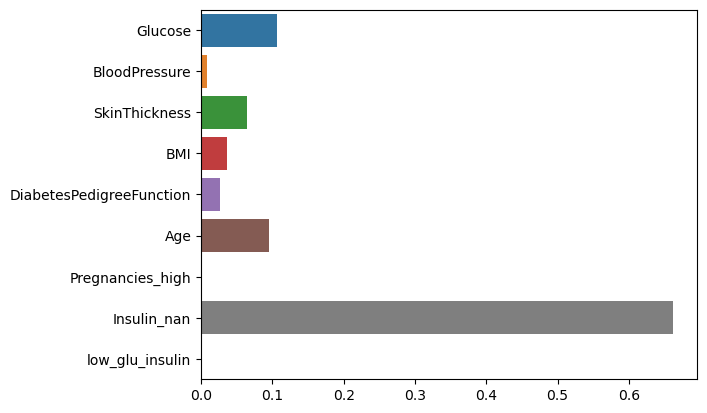

In [42]:
sns.barplot(x=model.feature_importances_, y=feature_names)

# 7 학습과 예측하기

In [43]:
# decisiontree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
# 깊이 조절한 거 -> max_depth=3
model


NameError: name 'max_depth' is not defined

In [44]:
for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    y_predict=model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

NameError: name 'accuracy_score' is not defined

In [45]:
# 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [46]:
feature_names=X_train.columns.tolist()

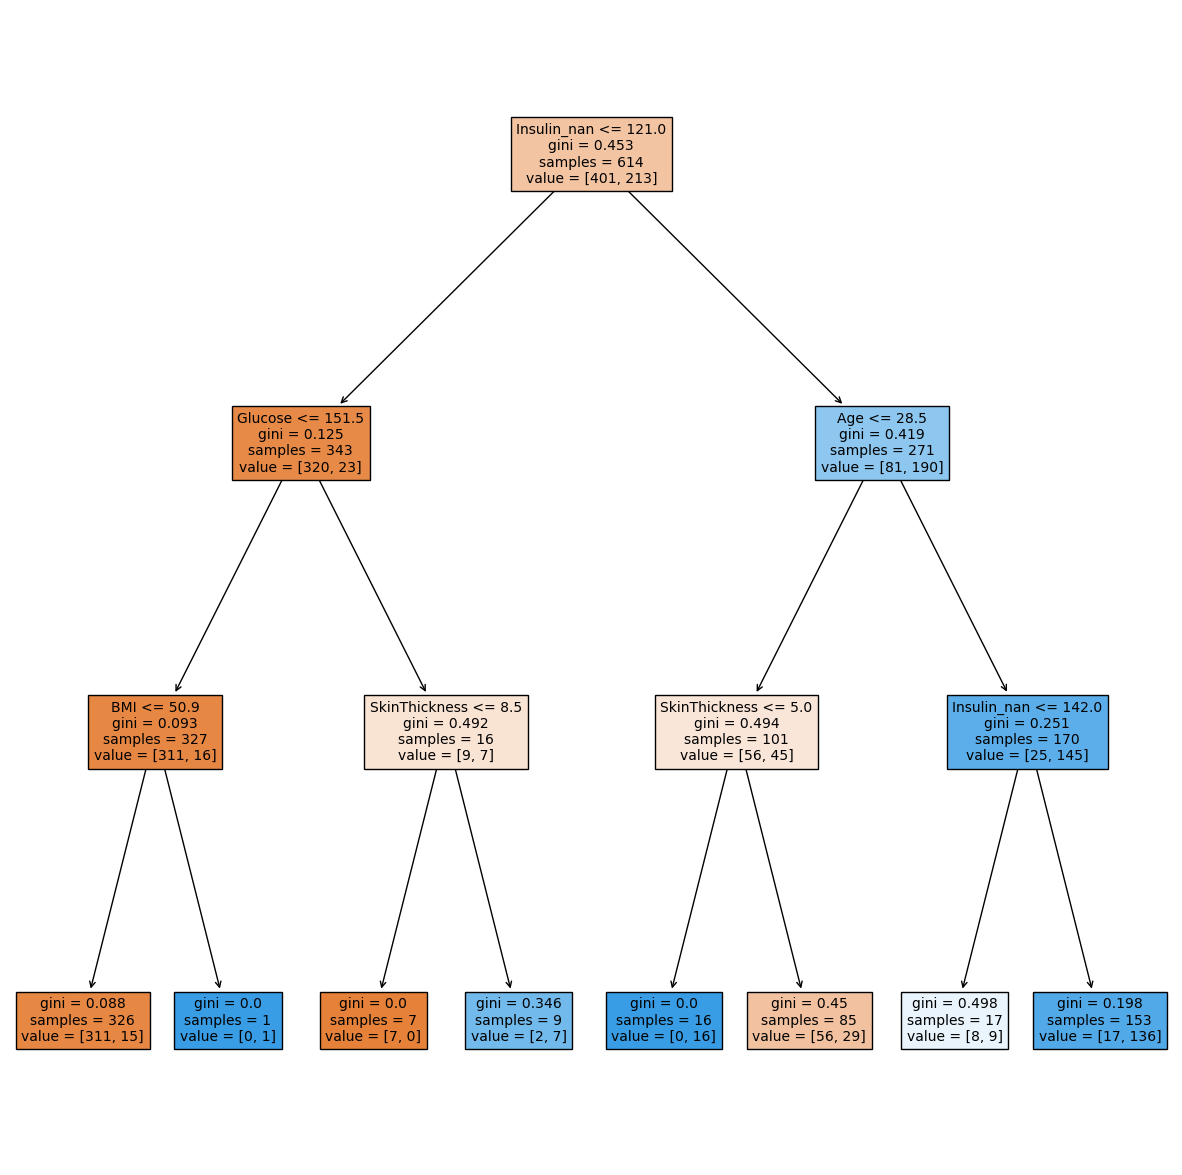

In [47]:
from sklearn.tree import plot_tree
# plot_tree(model) # 문자로 나오게 된다.
plt.figure(figsize=(15,15))
tree=plot_tree(model, feature_names = feature_names, fontsize=10, filled=True)

In [48]:
# 예측하고 결과를 y_predict
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

# 8 accuracy 측정하기

In [49]:
# 다르게 예측한 갯수를 구해서 diff_count에 할당
y_predict - y_test
abs(y_predict - y_test).sum()
# random _state 지정을 안해줘서 계속 랜덤 -> decisiontree 에도 적용

23

In [50]:
# accuracy score구한다

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)*100

85.06493506493507